In [1]:
from scipy.stats import itemfreq

from matplotlib import pyplot

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

## The idea behind this notebook is to see how `Accuracy` and `ROC-Curves` fail to to proper interpret/evaluate a model making trained and making predictions over very imbalaced data:

* Precision/Recall over Accuracy 
* Precision-Recall curve over ROC curve

# Let's first generate a 2 class imbalanced dataset

In [2]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.95,0.05], random_state=42)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

In [3]:
itemfreq(y)

/tmp/ipykernel_2704101/2382982102.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y)


array([[   0, 9460],
       [   1,  540]])

In [4]:
itemfreq(trainy)

/tmp/ipykernel_2704101/3779774318.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(trainy)


array([[   0, 7576],
       [   1,  424]])

In [5]:
itemfreq(testy)

/tmp/ipykernel_2704101/2381832891.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(testy)


array([[   0, 1884],
       [   1,  116]])

# Train a model for classification

In [6]:
model = LogisticRegression()
model.fit(trainX, trainy)

LogisticRegression()

In [7]:
predictions = model.predict(testX)

# Comparing the Accuracy vs. Precision-Recall with imbalenced data

In [8]:
accuracy = accuracy_score(testy, predictions)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.957


In [9]:
print(classification_report(testy, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1884
           1       0.73      0.41      0.53       116

    accuracy                           0.96      2000
   macro avg       0.85      0.70      0.75      2000
weighted avg       0.95      0.96      0.95      2000



# ROC Curve vs. Precision-Recall Curve with imbalenced data

In [10]:
probs = model.predict_proba(testX)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works

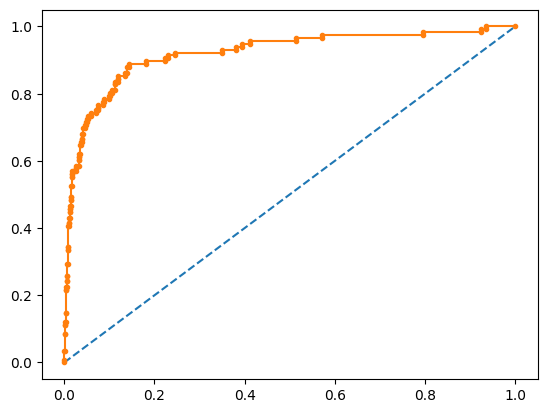

AUC: 0.920


In [11]:
fpr, tpr, thresholds = roc_curve(testy, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc_score)

# Precision-Recall curve

In [12]:
precision, recall, thresholds = precision_recall_curve(testy, probs)
auc_score = auc(recall, precision)

In [16]:
print(len(precision))
print(len(recall))

2001
2001


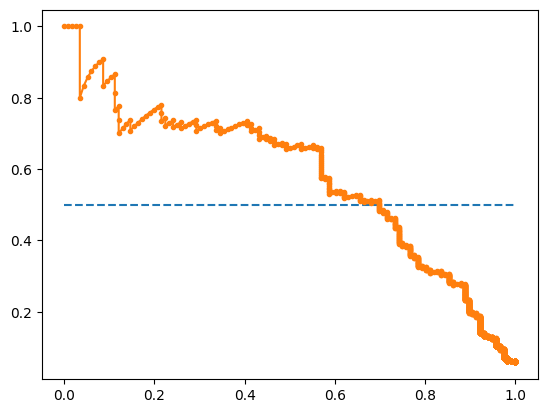

AUC: 0.577


In [13]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.show()
print('AUC: %.3f' % auc_score)